<span style="color: blue; font-weight:bold=;font-size:30px;"> Mathematical Representation of a Mobius Strip in 3D</h2></span>

In [28]:
from mpl_toolkits.mplot3d import Axes3D  # Used for 3D plotting
import matplotlib.pyplot as plt         # For visualization
import numpy as np                      # For numerical computations

class MobiusStrip:
    def __init__(self, R, w, n):
        """
        Constructor for initializing the MobiusStrip class.
        Parameters:
        R - radius of the central circle
        w - width of the strip
        n - resolution (number of divisions along u and v)
        """
        self.R = R          # it is Radius from the center of the strip
        self.w = w          # it is Width of the strip
        self.n = n          # indicates Number of mesh points (resolution)
        
        # Create 1D arrays for u and v using linspace:
        # u goes from 0 to 2π (full circle), v from -w/2 to +w/2 (width of strip)
        self.u_vals = np.linspace(0, 2 * np.pi, n)
        self.v_vals = np.linspace(-w / 2, w / 2, n)

        # Generate the 3D mesh of the Mobius strip
        # self.X, self.Y = self.generate_mesh()
        self.X, self.Y, self.Z = self.generate_mesh()

    def generate_mesh(self):
        """
        Generates the 3D coordinates (x,y,z) of the Mobius strip surface
        using the parametric equations.
        """
        u, v = np.meshgrid(self.u_vals, self.v_vals)  # Create a grid of u and v values
        
        # Parametric equations of Mobius strip
        X = (self.R + v * np.cos(u / 2)) * np.cos(u)
        Y = (self.R + v * np.cos(u / 2)) * np.sin(u)
        Z = v * np.sin(u / 2)

        return X, Y, Z

    def compute_surface_area(self):
        """
        Approximates the surface area of the Mobius strip using numerical integration.
        """
        du = 2 * np.pi / (self.n - 1)  # Step size in u
        dv = self.w / (self.n - 1)     # Step size in v

        # Compute partial derivatives w.r.t u
        Xu = np.gradient(self.X, du, axis=1)
        Yu = np.gradient(self.Y, du, axis=1)
        Zu = np.gradient(self.Z, du, axis=1)

        # Compute partial derivatives w.r.t v
        Xv = np.gradient(self.X, dv, axis=0)
        Yv = np.gradient(self.Y, dv, axis=0)
        Zv = np.gradient(self.Z, dv, axis=0)

        # Cross product of partial derivatives to find area element dA
        cross_x = Yu * Zv - Zu * Yv
        cross_y = Zu * Xv - Xu * Zv
        cross_z = Xu * Yv - Yu * Xv

        # Magnitude of the cross product vector (|dA|)
        dA = np.sqrt(cross_x**2 + cross_y**2 + cross_z**2)

        # Approximate the surface area by summing dA over the surface
        return np.sum(dA) * du * dv

    def compute_edge_length(self):
        """
        Computes the length of the boundary edge of the Mobius strip.
        The strip has two edges (v = -w/2 and v = w/2), and we sum their arc lengths.
        """
        # Get the start and end edges (v = -w/2 and v = w/2)
        edge1 = (self.X[0, :], self.Y[0, :], self.Z[0, :])     # Bottom edge
        edge2 = (self.X[-1, :], self.Y[-1, :], self.Z[-1, :])  # Top edge

        # Compute arc length of an edge (used for both edge1 and edge2)
        def arc_length(edge):
            dx = np.diff(edge[0])  # Difference in x-coordinates
            dy = np.diff(edge[1])  # Difference in y-coordinates
            dz = np.diff(edge[2])  # Difference in z-coordinates
            return np.sum(np.sqrt(dx**2 + dy**2 + dz**2))  # Euclidean distance between points

        return arc_length(edge1) + arc_length(edge2)  # Total edge length

    def plot(self):
        """
        Plots the 3D Mobius strip using matplotlib.
        """
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')  # 3D subplot

        # Plot the surface with color map 'viridis'
        ax.plot_surface(self.X, self.Y, self.Z, cmap='viridis')
        plt.xlabel("x-axis")
        plt.ylabel("y-axis")
        # plt.zlabel("z-axis")
        ax.set_title("Mobius Strip")
        plt.show()  # Display the plot


Surface Area: 64.17458381956531
Edge Length: 63.14092989098662


<Figure size 640x480 with 0 Axes>

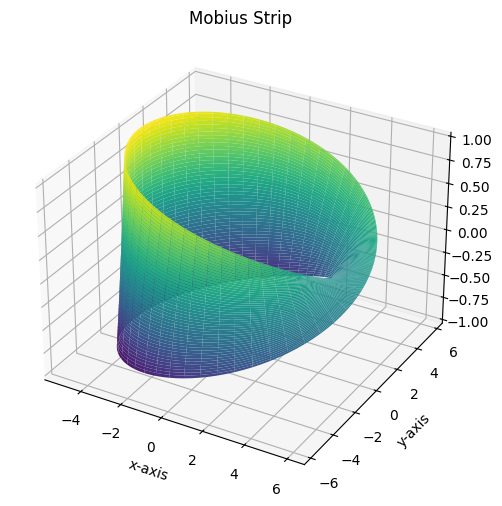

In [29]:
import numpy as np
import matplotlib.pyplot as plt

strip = MobiusStrip(R=5, w=2, n=100)
area = strip.compute_surface_area()
edge = strip.compute_edge_length()
print("Surface Area:", area)
print("Edge Length:", edge)
plt.savefig("mobius_plot.png")
strip.plot()


<font color="green"><b>Steps Included in creating 3D model of Mobius strip in python</b></font>

🟡 Step1:  Create a Python class called MobiusStrip by using the formulas to generate                (x,y,z) and implemented  using numpy and matplotlib
           The Formulas are:
           x(u,v)=(R+v⋅cos⁡(u2))⋅cos⁡(u)
           y(u,v)=(R+v⋅cos⁡(u2))⋅sin⁡(u)
           z(u,v)=v⋅sin⁡(u2)
           
           Where:
           u∈[0,2π]
           v∈[−w/2,w/2]
    
           Terms:
                u	Angle around the loop (from 0 to 2𝜋)
                v	Position across the strip’s width
                R	Distance from center to strip center
                w	Total width of the strip
🟡 Step2:  Calculate
            Surface area: use math/approximation.
            Edge length: use distance formula along the strip's edge.

🟡 Step3:  Plot the Strip
            Use matplotlib to show the Möbius strip in 3D. 
            Save the image using plt.savefig("mobius_plot.png").
            
               
                   